In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("data/labeledTrainData.tsv", delimiter="\t")

In [3]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
data.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [5]:
vectorizer = CountVectorizer()

In [6]:
np.random.seed(42)

X = data.review
y = data.sentiment

# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
len(X_train), len(X_test), len(y_train), len(y_test) 

(20000, 5000, 20000, 5000)

In [8]:
y_train.value_counts(), y_test.value_counts()

(0    10019
 1     9981
 Name: sentiment, dtype: int64,
 1    2519
 0    2481
 Name: sentiment, dtype: int64)

In [9]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [10]:
vectorizer.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>

In [11]:
feature_names = vectorizer.get_feature_names()
len(feature_names)

68308

In [12]:
feature_names[3000:3020]

['aneurism',
 'aneurysm',
 'anew',
 'anextremely',
 'ang',
 'ange',
 'angel',
 'angela',
 'angelena',
 'angeles',
 'angeletti',
 'angelfire',
 'angeli',
 'angelic',
 'angelica',
 'angelical',
 'angelina',
 'angeline',
 'angelique',
 'angell']

In [13]:
feature_names[::2000]

['00',
 'agreeing',
 'artsieness',
 'beguiled',
 'brandner',
 'cataclysm',
 'cohens',
 'crassly',
 'denim',
 'dorkily',
 'engrossment',
 'featured',
 'fsb',
 'grants',
 'henpecked',
 'impede',
 'janina',
 'kristoffersons',
 'loomed',
 'mcbride',
 'morality',
 'northram',
 'pancha',
 'pleasantness',
 'punctuation',
 'religious',
 'rvd',
 'sextmus',
 'snogging',
 'strained',
 'tatta',
 'transmuted',
 'unredemable',
 'watching',
 'zannuck']

## Logistic Regression

In [14]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)
lr_score

O:\ml_projects\nltk\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8848

In [15]:
lr_pred = lr_model.predict(X_test)
lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_conf_mat

array([[2183,  298],
       [ 278, 2241]], dtype=int64)

In [16]:
# For plotting the confusion matrix
import seaborn as sns

sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='d')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

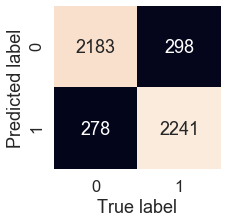

In [17]:
plot_conf_mat(y_test ,lr_pred)

## Naive Bayes classifier

In [18]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_score = nb_model.score(X_test, y_test)
nb_score

0.8486

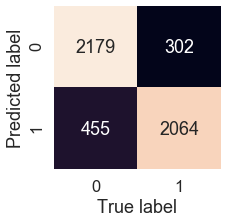

In [19]:
nb_pred = nb_model.predict(X_test)
plot_conf_mat(y_test, nb_pred)

## Random Forest Classifier

In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
rf_score

0.8462

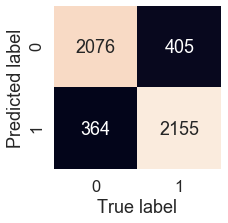

In [21]:
rf_pred = rf_model.predict(X_test)
plot_conf_mat(y_test, rf_pred)

## KNeighbors Classifier

In [22]:
KN_model = KNeighborsClassifier()
KN_model.fit(X_train, y_train)
KN_score = KN_model.score(X_test, y_test)
KN_score

0.6276

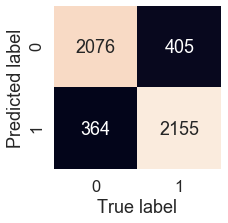

In [23]:
KN_pred = KN_model.predict(X_test)
plot_conf_mat(y_test, rf_pred)

## Decision Tree Classifier

In [24]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
DT_score = DT_model.score(X_test, y_test)
DT_score

0.6996

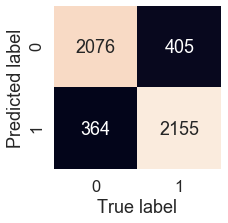

In [25]:
DT_pred = DT_model.predict(X_test)
plot_conf_mat(y_test, rf_pred)

## SGDClassifier

In [26]:
sgd_model = SGDClassifier(max_iter=200)
sgd_model.fit(X_train, y_train)
sgd_score = sgd_model.score(X_test, y_test)
sgd_score

0.881

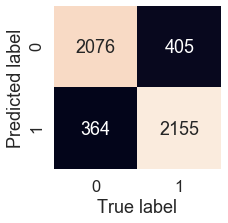

In [27]:
sgd_pred = sgd_model.predict(X_test)
plot_conf_mat(y_test, rf_pred)

#### Let's Plot the Data and compare

In [28]:
## Plotting the data
compare_matrix = {"Logistic Regression": lr_score,
                  "Random Forest": rf_score,
                  "Naive Bayes": nb_score,
                  "K-Neighbors": KN_score,
                  "Decision Tree": DT_score,
                  "SGD Classifier": sgd_score}

In [29]:
dataframe = pd.DataFrame(compare_matrix, index=[0])
dataframe

,Logistic Regression,Random Forest,Naive Bayes,K-Neighbors,Decision Tree,SGD Classifier
0,0.8848,0.8462,0.8486,0.6276,0.6996,0.881


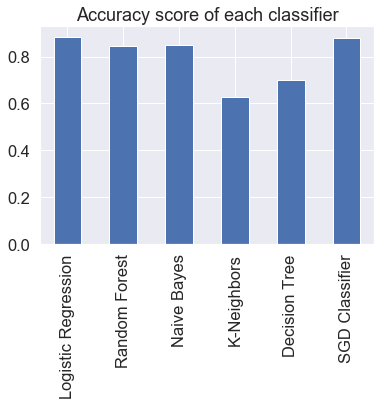

In [32]:
dataframe.T.plot.bar(title="Accuracy score of each classifier",
                     legend=False)

## Voting Classifier

**Let's take the top three classifiers with the highest accuracy**

In [33]:
from sklearn.ensemble import VotingClassifier

models = [("Logistic Regression", LogisticRegression()),
          ("SGD Classifier", SGDClassifier(max_iter=200)),
          ("Naive Bayes", MultinomialNB())]

In [34]:
voting_model = VotingClassifier(estimators=models, voting='hard', n_jobs=-1)

In [35]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SGD Classifier',
                              SGDClassifier(alpha=0.0001, average=False,
                                            clas...
                                            eta0=0.0, fit_intercept=True,
                          

In [36]:
voting_score = voting_model.score(X_test, y_test)
voting_score

0.8886

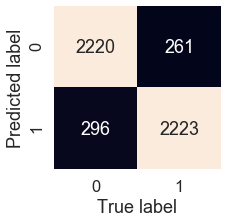

In [37]:
voting_pred = voting_model.predict(X_test)
plot_conf_mat(y_test, voting_pred)

### Let's Visualize it

In [51]:
compare_matrix = {"Logistic Regression": lr_score*100,
                  "Random Forest": rf_score*100,
                  "Naive Bayes": nb_score*100,
                  "K-Neighbors": KN_score*100,
                  "Decision Tree": DT_score*100,
                  "SGD Classifier": sgd_score*100,
                  "Voting Classifier": voting_score*100}

In [52]:
dataframe = pd.DataFrame(compare_matrix, index=[0])
dataframe

,Logistic Regression,Random Forest,Naive Bayes,K-Neighbors,Decision Tree,SGD Classifier,Voting Classifier
0,88.48,84.62,84.86,62.76,69.96,88.1,88.86


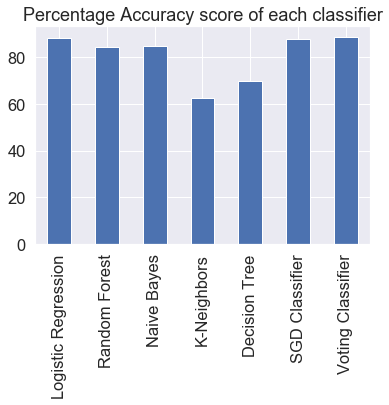

In [59]:
dataframe.T.plot.bar(title="Percentage Accuracy score of each classifier",
                     legend=False)

### Let's customize our Plot

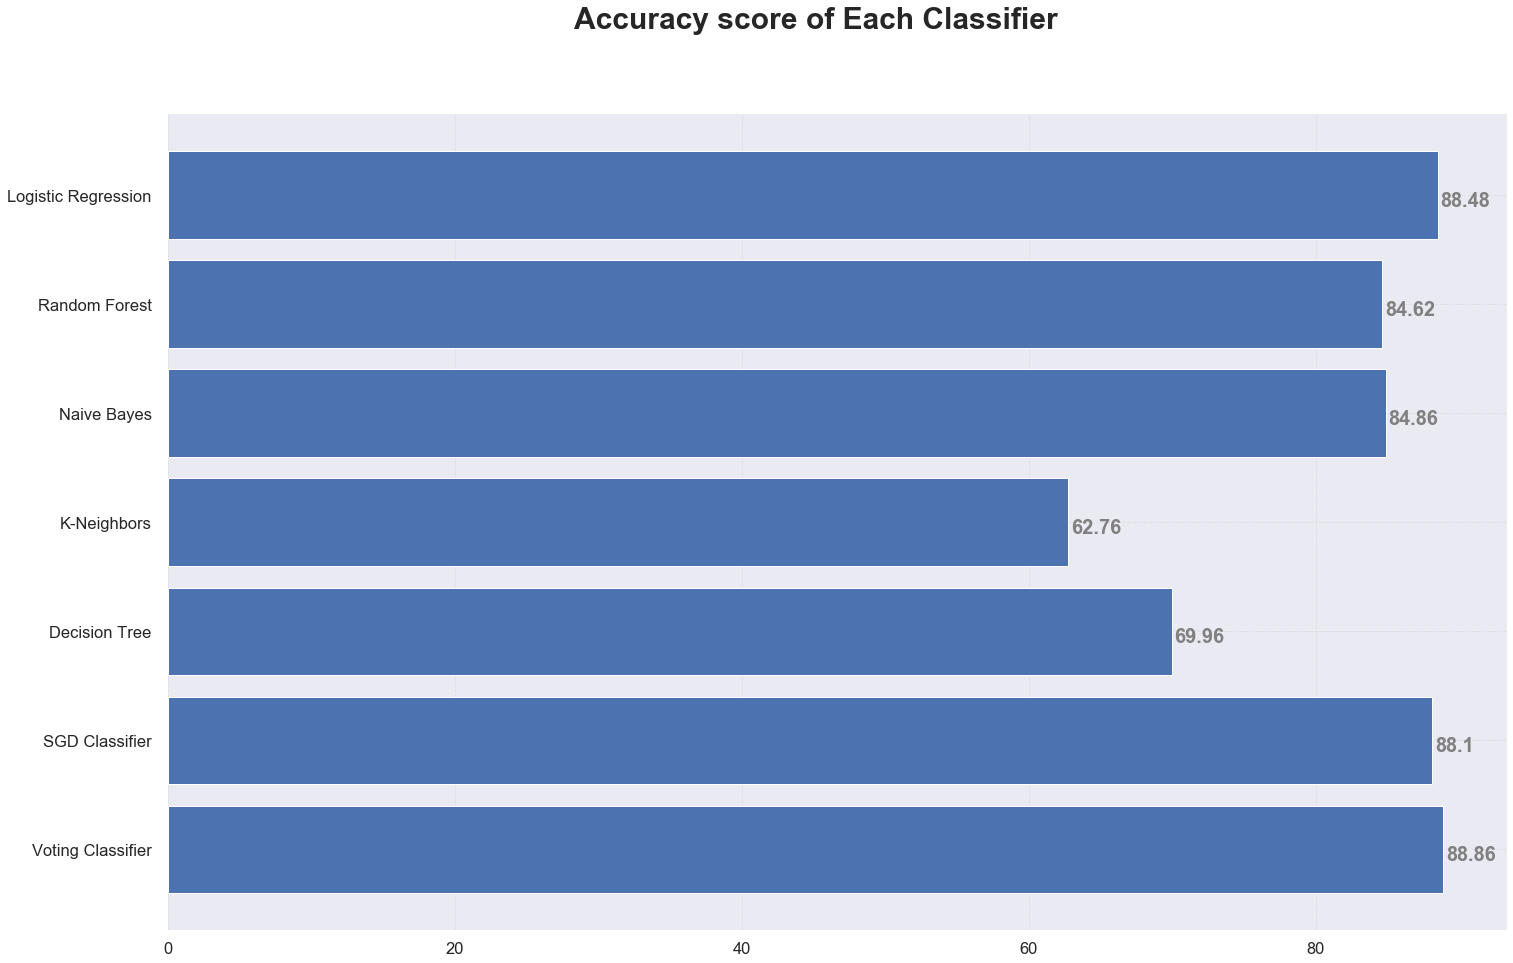

In [86]:
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes',
          'K-Neighbors', 'Decision Tree',
          'SGD Classifier','Voting Classifier']
score = [lr_score*100, rf_score*100, nb_score*100, KN_score*100, DT_score*100, sgd_score*100, voting_score*100]

fig, ax = plt.subplots(figsize =(24, 15)) 
  
# Horizontal Bar Plot 
ax.barh(models, score) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 20, fontweight ='bold', 
             color ='grey') 
  
# # Add Plot Title 
# ax.set_title('Percentage Accuracy score of Each classifier', 
#              loc ='left', )  

fig.suptitle('Accuracy score of Each Classifier', fontsize=30, fontweight="bold");

# Show Plot 
plt.show()

In [87]:
# save the plot
fig.savefig('scores.png')